<a href="https://colab.research.google.com/github/divypandya/OpenCV-Projects/blob/master/Detecting_Facial_Landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    
    # return a tuple of (x, y, w, h)
    return (x, y, w, h)


In [0]:
def shape_to_np(shape, dtype = 'int'):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype = dtype)
    
    # loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
        
    # return the list of (x, y)-coordinates
    return coords


In [0]:
# import the necessary packages
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow

args = {'shape_predictor' : 'drive/My Drive/Colab Notebooks/CV Tutorials/Face Detector/shape_predictor_68_face_landmarks.dat' ,
       'image' : 'drive/My Drive/Colab Notebooks/CV Tutorials/Dataset/example_01.jpg' 
       }


In [0]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args['shape_predictor'])
# load the input image, resize it, and convert it to grayscale
image = cv2.imread(args['image'])
image = imutils.resize(image, width = 500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

In [0]:
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
    shape = predictor(gray, rect)
    shape = shape_to_np(shape)
    
    # convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # show the face number
    cv2.putText(image, 'FACE #{}'.format(i + 1), (x - 10, y - 10),
               cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 2
               )
    
    # loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
        
        

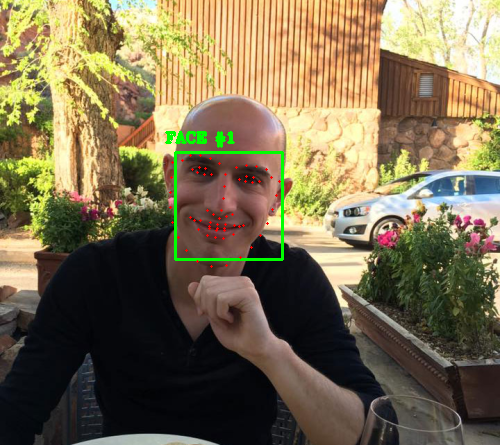

In [16]:
# show the output image with the face detections + facial landmarks
cv2_imshow(image)